In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json

# Correcting file paths and variable handling
with open('./data_rec/template_2/green_box.json', 'r') as file:
    green_data = json.load(file)

with open('./data_rec/template_2/med_bottle.json', 'r') as file:
    med_data = json.load(file)

with open('./data_rec/template_2/platic_bottle.json', 'r') as file:
    plastic_data = json.load(file)

# Extract servo angle data for visualization
def extract_servo_data(tasks):
    data = {'servo1': [], 'servo2': [], 'servo3': [], 'servo4': [], 'servo5': [], 'servo6': []}
    for task in tasks:
        action = task['action']
        for key in data.keys():
            data[key].append(action[key])
    return data

green_servo_data = extract_servo_data(green_data[0]['args']['tasks'])
med_servo_data = extract_servo_data(med_data[0]['args']['tasks'])
plastic_servo_data = extract_servo_data(plastic_data[0]['args']['tasks'])

green_servo_data, med_servo_data, plastic_servo_data

({'servo1': [90, 90, 90, 0, 0, 0],
  'servo2': [45, 45, 30, 30, 45, 45],
  'servo3': [30, 30, 30, 45, 45, 45],
  'servo4': [0, 0, 0, 0, 0, 0],
  'servo5': [0, 0, 0, 0, 0, 0],
  'servo6': [0, 45, 45, 45, 45, 0]},
 {'servo1': [90, 90, 90, 90, 45, 45, 45, 45],
  'servo2': [45, 90, 90, 45, 45, 90, 90, 45],
  'servo3': [90, 90, 90, 90, 90, 90, 90, 90],
  'servo4': [90, 90, 90, 90, 90, 90, 90, 90],
  'servo5': [90, 90, 90, 90, 90, 90, 90, 90],
  'servo6': [0, 0, 45, 45, 45, 45, 0, 0]},
 {'servo1': [90, 45, 45, 45, 45],
  'servo2': [45, 45, 45, 90, 90],
  'servo3': [90, 90, 45, 45, 45],
  'servo4': [90, 90, 90, 90, 90],
  'servo5': [90, 90, 90, 90, 90],
  'servo6': [90, 90, 90, 90, 0]})

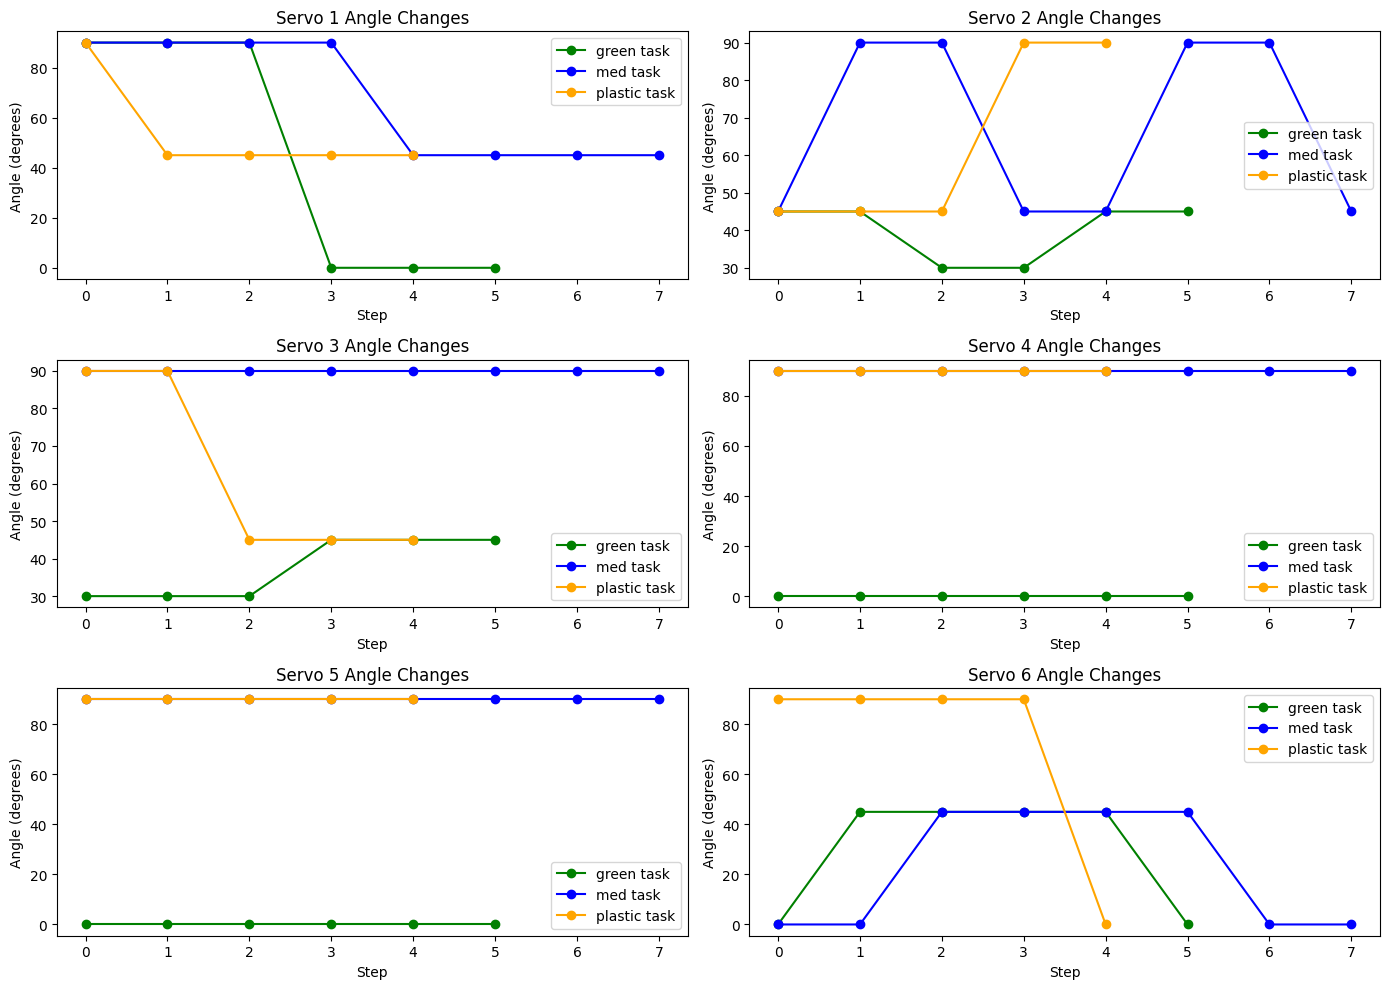

In [3]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create a plot for each servo in each task
tasks = ['green', 'med', 'plastic']
colors = ['green', 'blue', 'orange']
data = [green_servo_data, med_servo_data, plastic_servo_data]

# Create a subplot for each servo
for i in range(1, 7):
    ax = plt.subplot(3, 2, i)
    for j, servo_data in enumerate(data):
        ax.plot(servo_data[f'servo{i}'], label=f'{tasks[j]} task', color=colors[j], marker='o')
    ax.set_title(f'Servo {i} Angle Changes')
    ax.set_xlabel('Step')
    ax.set_ylabel('Angle (degrees)')
    ax.legend()

plt.tight_layout()
plt.show()


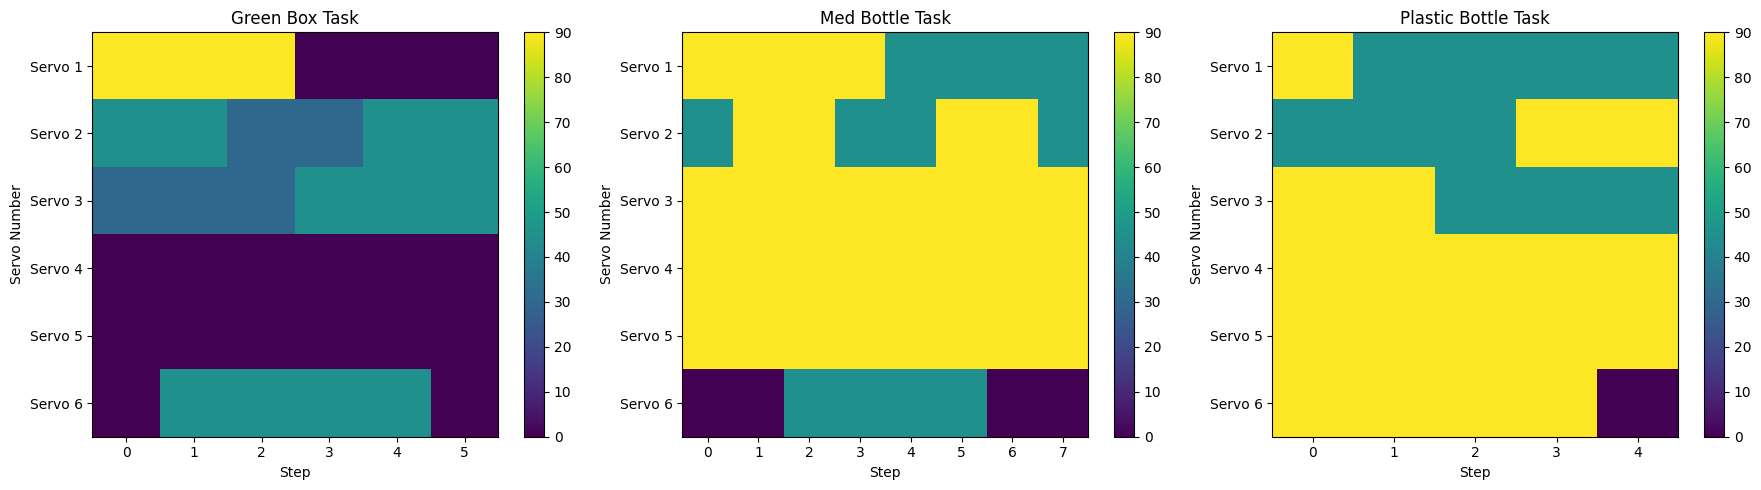

In [4]:
# Generate a heatmap data array from servo data
def generate_heatmap_data(servo_data):
    # Find maximum servo action counts among all tasks to standardize heatmap size
    max_len = max(len(data['servo1']) for data in servo_data)
    
    # Create an array filled with NaNs
    heatmap_data = np.full((6, max_len), np.nan)
    
    # Populate the array with servo angles
    for i, servo_key in enumerate(['servo1', 'servo2', 'servo3', 'servo4', 'servo5', 'servo6']):
        for j, task_data in enumerate(servo_data):
            for k, angle in enumerate(task_data[servo_key]):
                heatmap_data[i, k] = angle
    return heatmap_data

# Create heatmap data for each task
heatmap_green = generate_heatmap_data([green_servo_data])
heatmap_med = generate_heatmap_data([med_servo_data])
heatmap_plastic = generate_heatmap_data([plastic_servo_data])

# Plot the heatmaps
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Titles
titles = ['Green Box Task', 'Med Bottle Task', 'Plastic Bottle Task']

# Plot each heatmap
for i, heatmap in enumerate([heatmap_green, heatmap_med, heatmap_plastic]):
    im = axes[i].imshow(heatmap, cmap='viridis', aspect='auto')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Step')
    axes[i].set_ylabel('Servo Number')
    axes[i].set_yticks(range(6))
    axes[i].set_yticklabels([f'Servo {j+1}' for j in range(6)])
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()
